In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from src.datasets.loading import statcan, ookla
import math
import seaborn as sns


### 2022 and 2021

In [3]:
speed_tiles_q1_22 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2022)]
speed_tiles_q2_22 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==2) & (s.year==2022)]
speed_tiles_q3_22 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==3) & (s.year==2022)]
speed_tiles_q1_21 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2021)]
speed_tiles_q2_21 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==2) & (s.year==2021)]
speed_tiles_q3_21 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==3) & (s.year==2021)]
speed_tiles_q4_21 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==4) & (s.year==2021)]
speed_tiles_q1_20 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2020)]
speed_tiles_q2_20 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==2) & (s.year==2020)]
speed_tiles_q3_20 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==3) & (s.year==2020)]
speed_tiles_q4_20 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==4) & (s.year==2020)]
speed_tiles_q1_19 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2019)]
speed_tiles_q2_19 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==2) & (s.year==2019)]
speed_tiles_q3_19 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==3) & (s.year==2019)]
speed_tiles_q4_19 = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==4) & (s.year==2019)]

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [ ]:
# #Use a buffer to increase Edmonton size, envelope creates a bounding box for use later.
# edmonton_area = statcan.boundary('population_centres').loc[lambda s:s.PCNAME=='Edmonton'].copy()
# edmonton_area.geometry = edmonton_area.buffer(50000).envelope #The StatCan CRS is in units of meters, so this is all tiles within 50 km of Edmonton

# nearby_census_subdivs = statcan.boundary('census_subdivisions').sjoin(edmonton_area[['PCNAME','PCTYPE','PCCLASS','geometry']], how='inner')
# del nearby_census_subdivs['index_right']

# ## the spatial join against the much wider areas of the census subdivisions 
# ## causes the default plotting area to be much wider than anticipated with the 
# ## Edmonton area geoemtry
# nearby_speeds = speed_tiles.sjoin(edmonton_area.to_crs('epsg:4326'), how='inner') #epsg:4326
# ax = nearby_speeds.plot(column='avg_d_kbps',legend=True)
# nearby_census_subdivs.to_crs('epsg:4326').boundary.plot(ax=ax, linewidth=0.5)

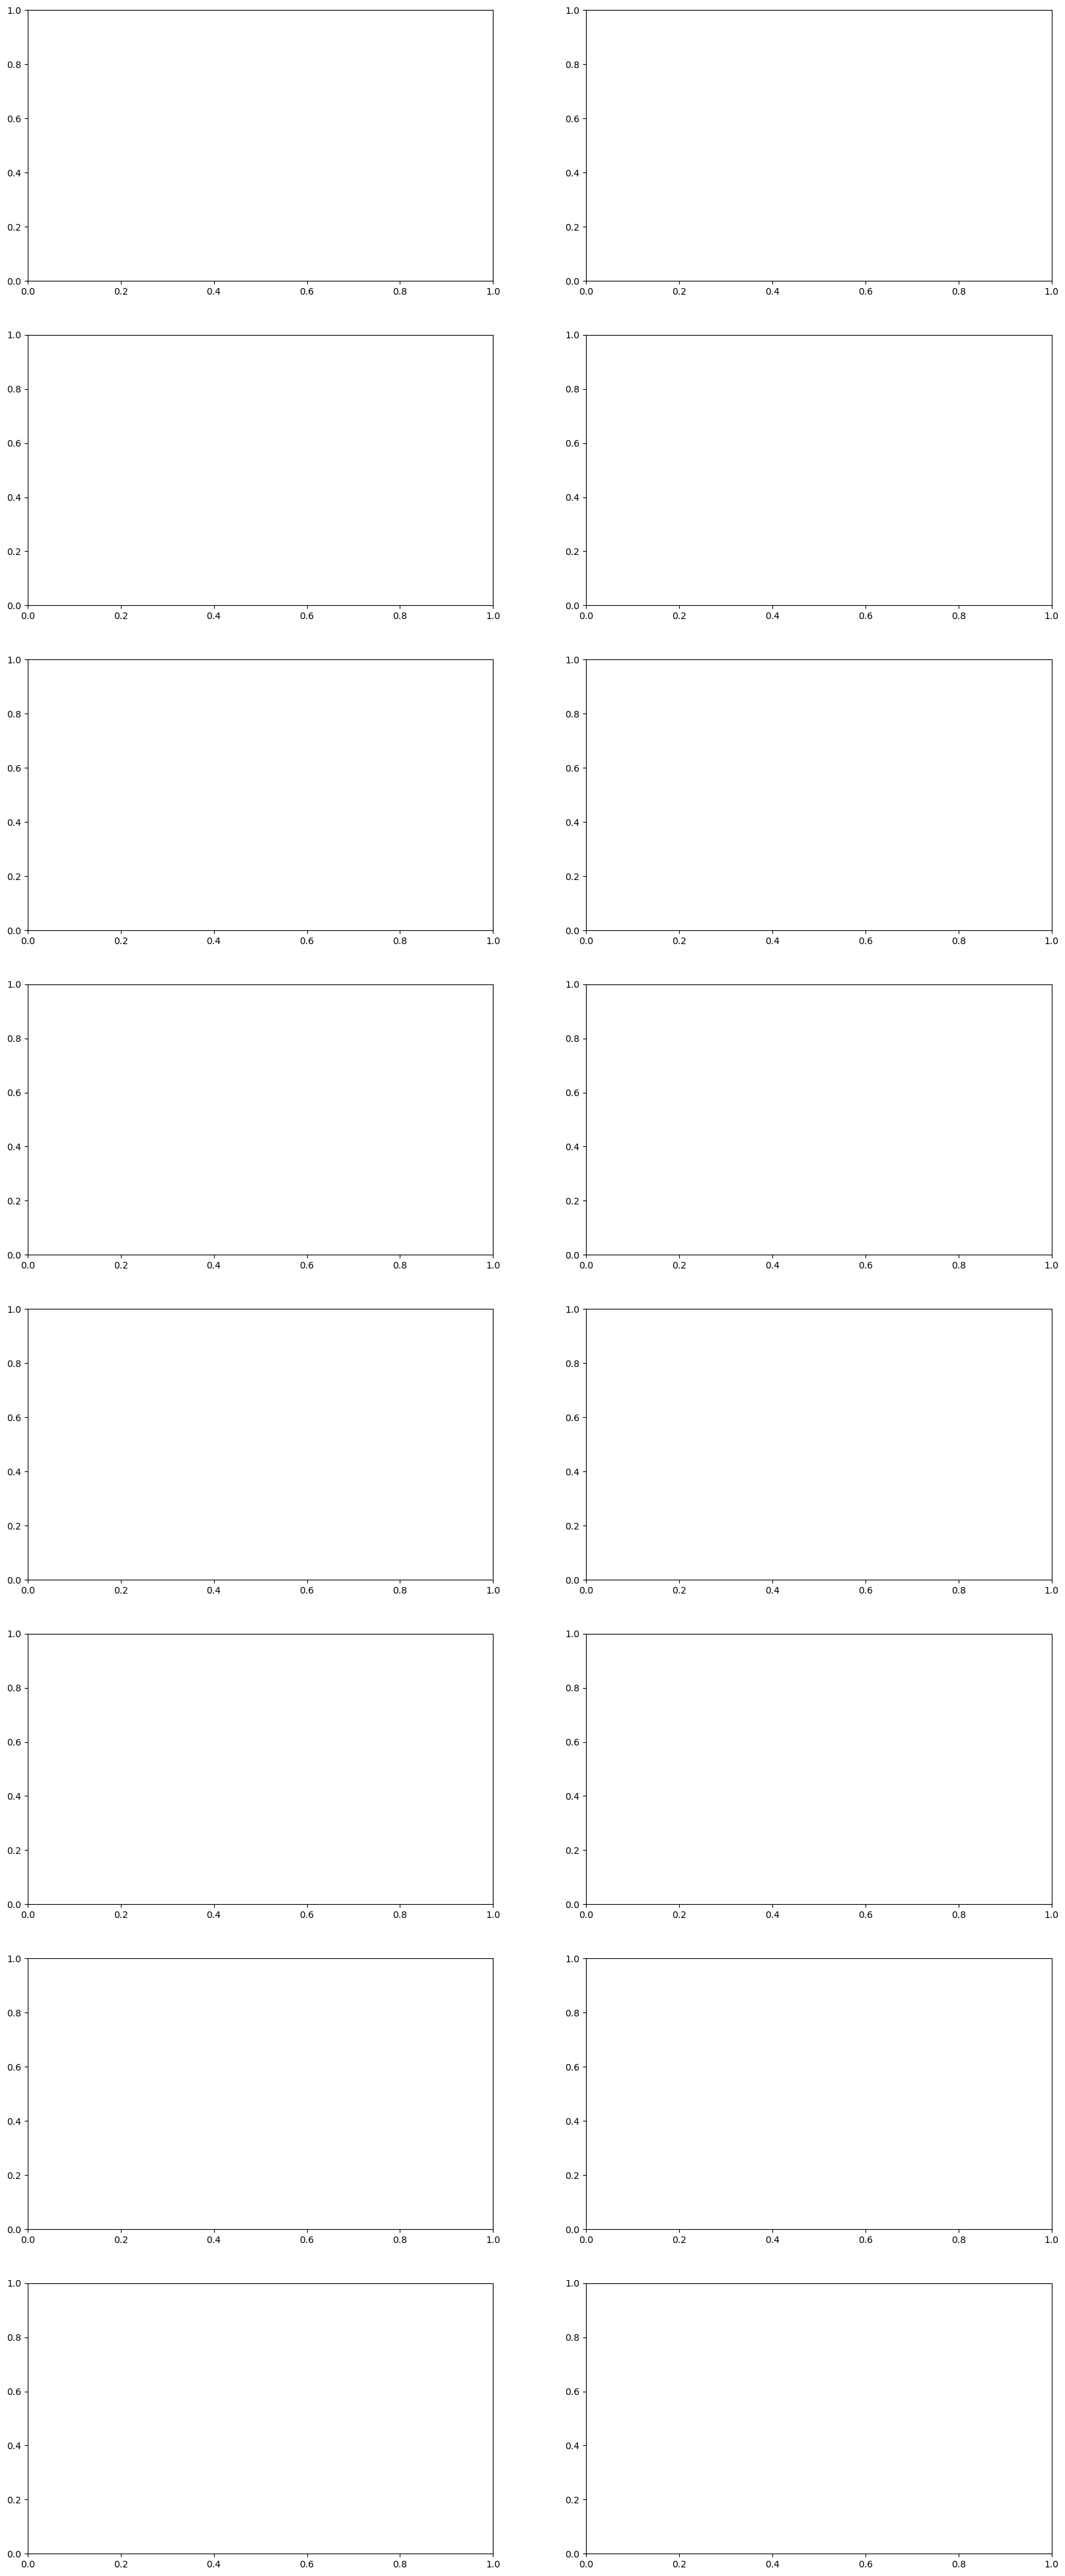

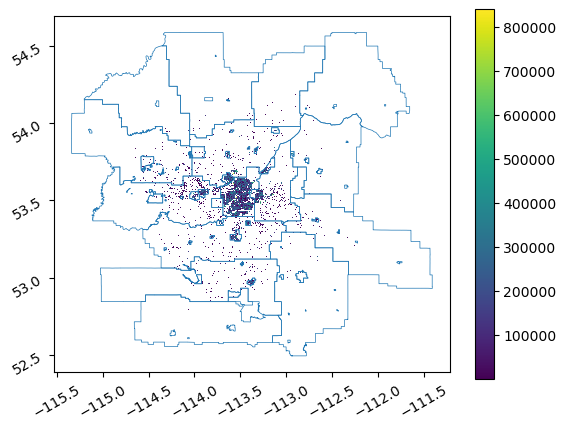

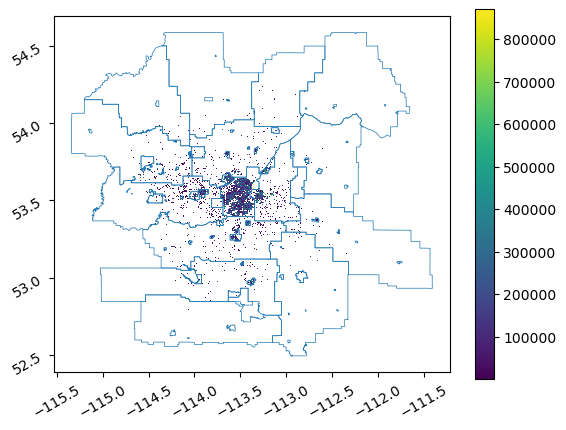

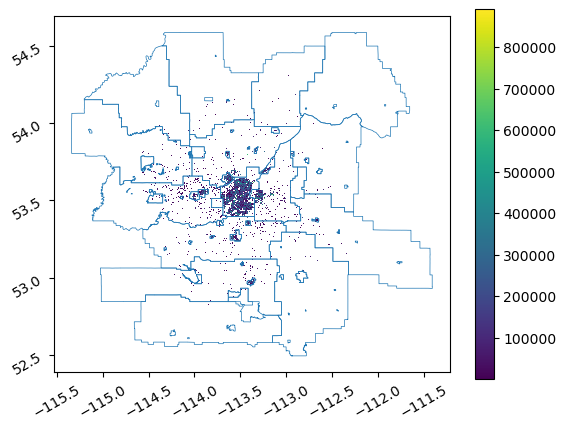

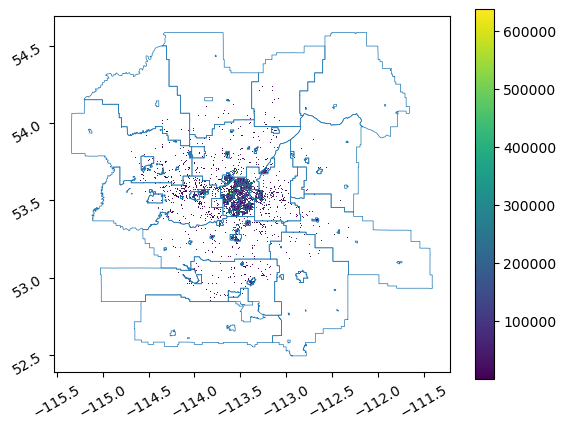

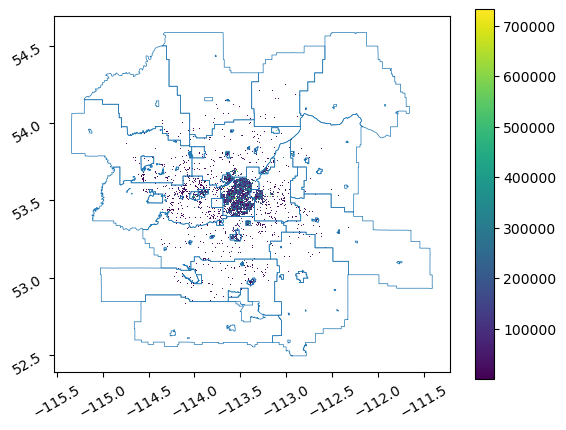

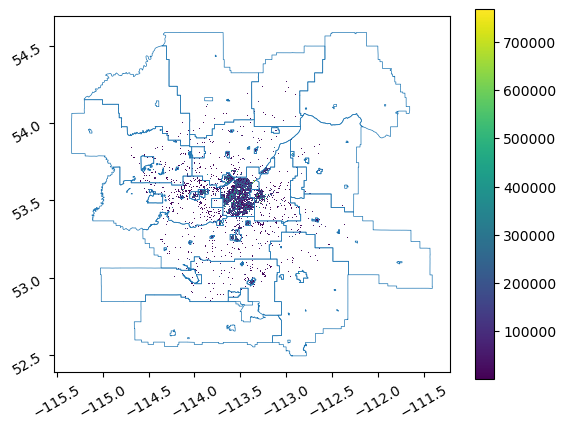

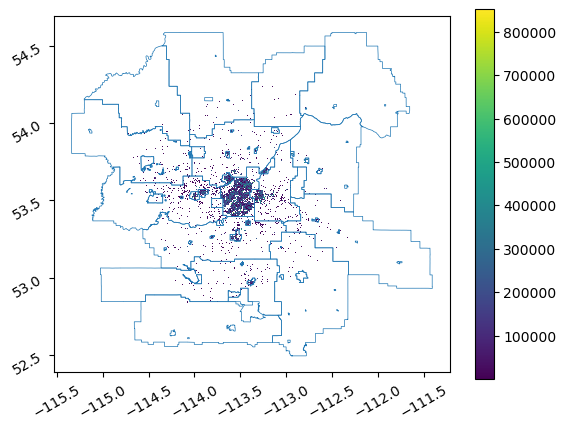

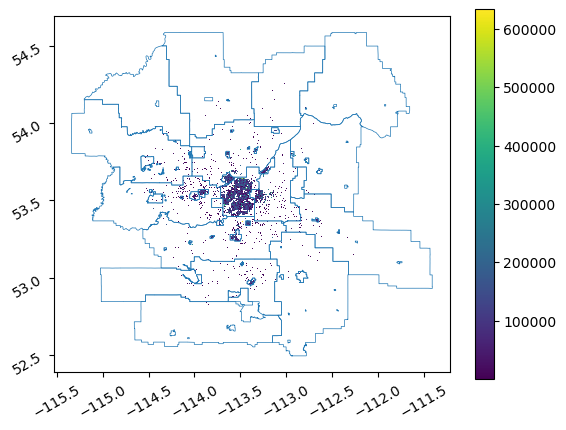

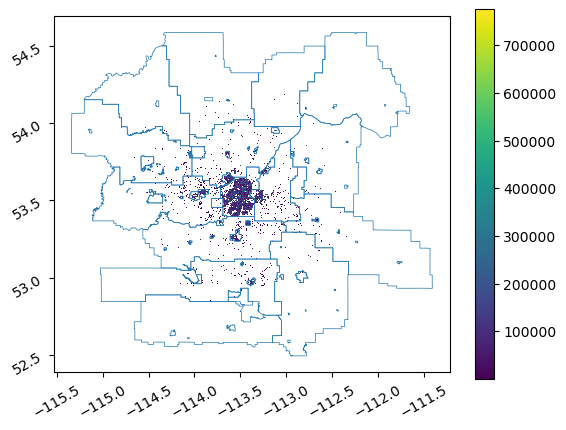

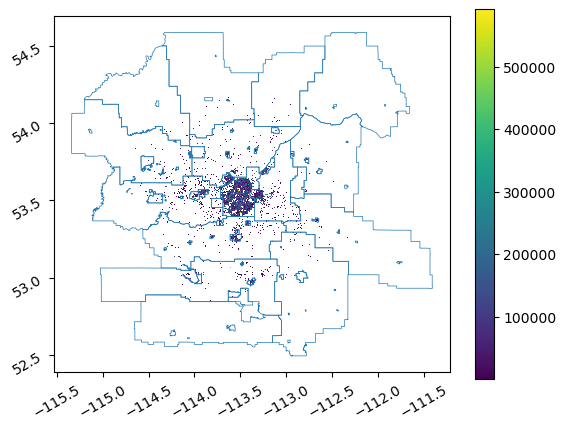

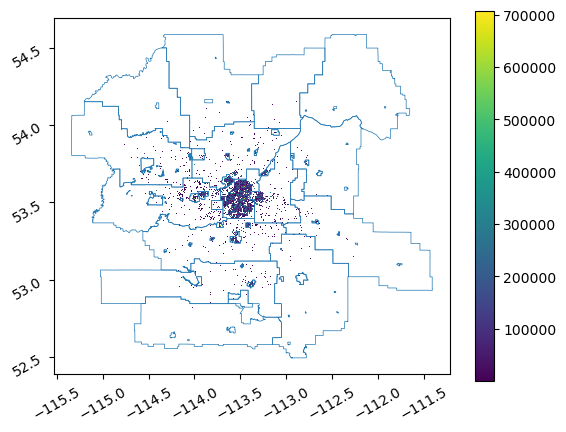

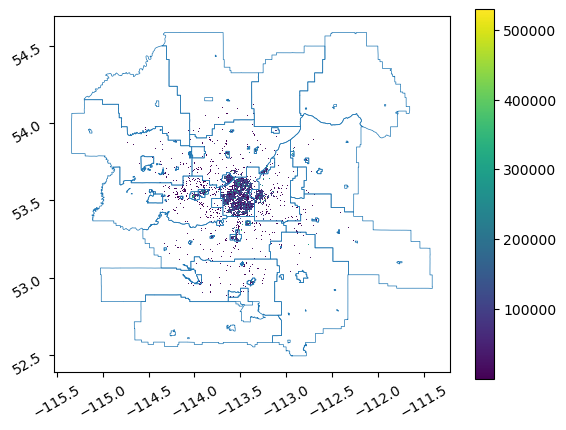

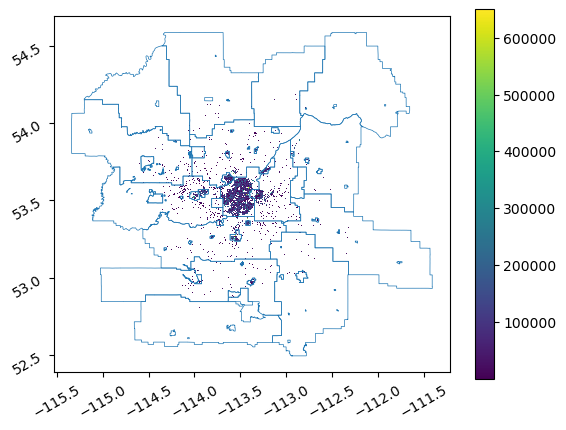

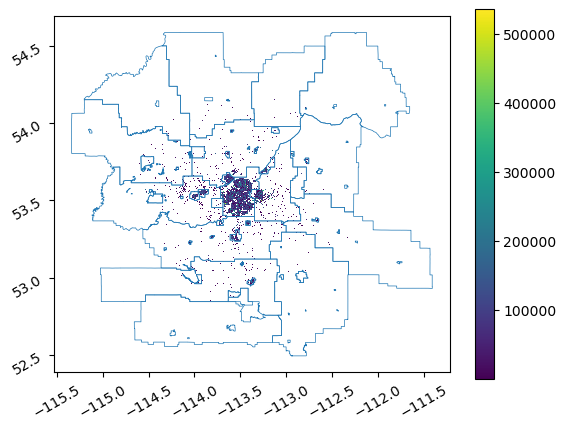

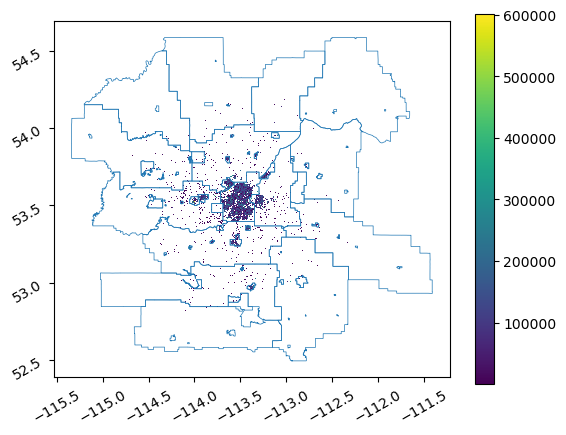

In [5]:
quarters = [speed_tiles_q1_22, speed_tiles_q2_22, speed_tiles_q3_22, \
            speed_tiles_q1_21, speed_tiles_q2_21, speed_tiles_q3_21, speed_tiles_q4_21, \
            speed_tiles_q1_20, speed_tiles_q2_20, speed_tiles_q3_20, speed_tiles_q4_20, \
            speed_tiles_q1_19, speed_tiles_q2_19, speed_tiles_q3_19, speed_tiles_q4_19]
var_num = len(quarters)
col_num = 2
row_num = math.ceil(var_num/col_num)
f, axes = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,50))
i = 0
j = 0
for quarter in quarters:
    #Use a buffer to increase Edmonton size, envelope creates a bounding box for use later.
    edmonton_area = statcan.boundary('population_centres').loc[lambda s:s.PCNAME=='Edmonton'].copy()
    edmonton_area.geometry = edmonton_area.buffer(50000).envelope #The StatCan CRS is in units of meters, so this is all tiles within 50 km of Edmonton

    nearby_census_subdivs = statcan.boundary('census_subdivisions').sjoin(edmonton_area[['PCNAME','PCTYPE','PCCLASS','geometry']], how='inner')
    del nearby_census_subdivs['index_right']

    ## the spatial join against the much wider areas of the census subdivisions 
    ## causes the default plotting area to be much wider than anticipated with the 
    ## Edmonton area geoemtry
    nearby_speeds = quarter.sjoin(edmonton_area.to_crs('epsg:4326'), how='inner') #epsg:4326
    axes[j][i] = nearby_speeds.plot(column='avg_d_kbps',legend=True)
    nearby_census_subdivs.to_crs('epsg:4326').boundary.plot(ax=axes[j][i], linewidth=0.5)

    axes[j][i].tick_params(labelrotation=30)
    i += 1
    if i >= col_num:
        i = 0
        j += 1